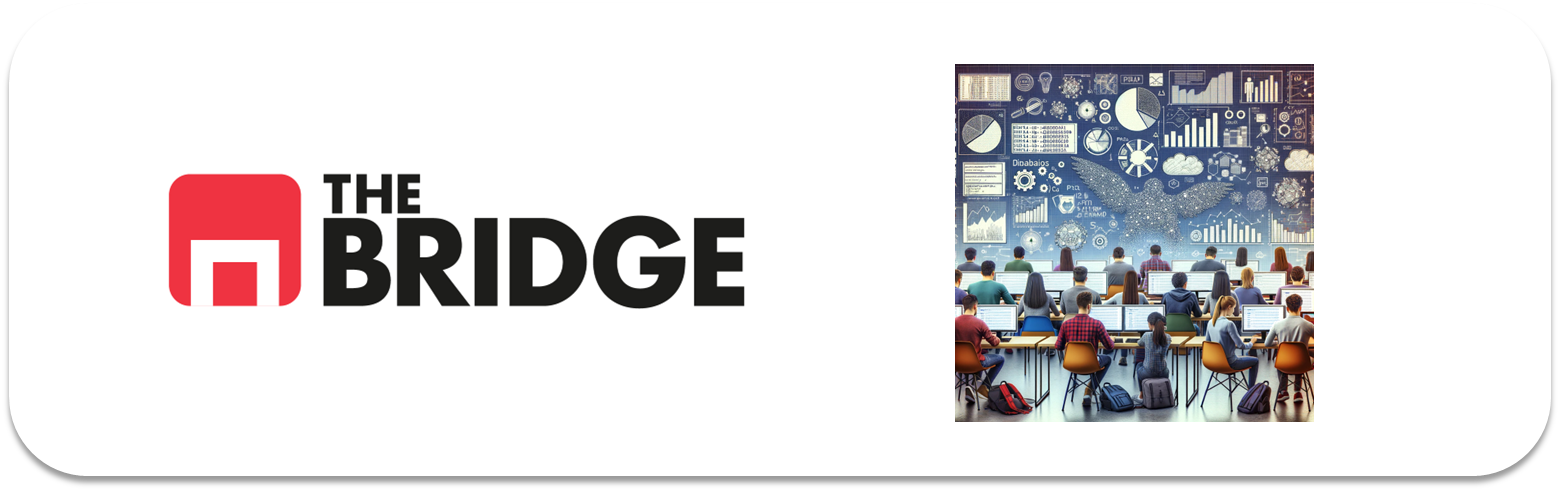

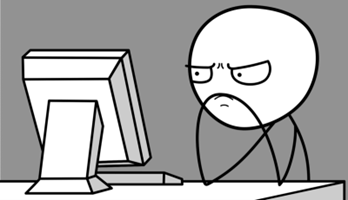

Para ejercitarte y afianzar lo aprendido sobre **Proceso de Datos**, como primera etapa de ML, completa los siguientes ejercicios. Recuerda que necesitarás datos que están en el directorio data que acompaña al notebook (búscalo en el repositorio de ejercicios)
  
La solución a los mismos las tienes ya, intenta no mirarlos de primeras pero no dejes de hacerlo cuando hayas terminado por si te pudieran aportar.

### Ejercicio 0

Importa los paquetes y módulos que necesites a lo largo del notebook

In [1]:
import matplotlib.pyplot as plt 
import numpy as np
import pandas as pd
import seaborn as sns

from bootcampviztools import pinta_distribucion_categoricas, plot_categorical_numerical_relationship, plot_grouped_histograms
from sklearn.model_selection import train_test_split

### Ejercicio 1

Carga el dataset de advertising que encontrarás en la carpeta de datos. Muestra su información general. ¿Qué te llama la atención? ¿Tendremos que limpiar alguna variable?

In [2]:
df_adv = pd.read_csv("./data/advertising_ml.csv")
df_adv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Daily Time Spent on Site  1000 non-null   float64
 1   Age                       1000 non-null   object 
 2   Area Income               1000 non-null   float64
 3   Daily Internet Usage      1000 non-null   float64
 4   Ad Topic Line             1000 non-null   object 
 5   City                      1000 non-null   object 
 6   Male                      1000 non-null   int64  
 7   Country                   1000 non-null   object 
 8   Timestamp                 1000 non-null   object 
 9   Clicked on Ad             1000 non-null   int64  
dtypes: float64(3), int64(2), object(5)
memory usage: 78.2+ KB


In [3]:
df_adv.sample(5)

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
177,72.04,22 años,60309.58,199.43,Realigned systematic function,Hernandezfort,0,Rwanda,2016-02-10 06:52:07,0
26,48.53,28 años,38067.08,134.14,Ameliorated client-driven forecast,West Jeremyside,1,Tuvalu,2016-02-08 10:46:14,1
191,60.23,35 years,43313.73,106.86,Balanced asynchronous hierarchy,New Brendafurt,0,Kenya,2016-03-08 18:00:43,1
941,78.76,51 años,66980.27,162.05,Face-to-face modular budgetary management,South Davidhaven,0,Ghana,2016-07-23 04:04:42,1
699,73.88,29 years,63109.74,233.61,Digitized zero-defect implementation,Kennethview,0,Saint Helena,2016-01-04 06:37:15,0


### Ejercicio 2

Tenemos que entender el problema antes de seguir. Nos dicen que la compañía "QuickRespond" quiere poder generar un modelo que a partir de datos como los del dataset para poder dirigir mejor su campaña de anuncios. Hablando con ellos llegamos a la conclusión de que queremos un modelo para poder predecir si un usuario pulsará en el link de un anuncio o no. ¿Qué tipo de problemas estamos tratando?¿Y de que tipo de aprendizaje?¿Existe una variable target que puedas identificar rapidamente?

In [4]:
# Clasificasíon (Supervisionado)

### Ejercicio 3

Volvamos ya a los datos. Intenta dar una definicón de cada columna, obten su cardinalidad y en función de esta y del tipo de variable de pandas, clasifícalas en categóricas y numéricas.

In [5]:
def cardinal(df):
    cardinalidad = len(df.unique())/len(df) * 100
    return cardinalidad

df_adv.apply(cardinal)

Daily Time Spent on Site     90.0
Age                           8.3
Area Income                 100.0
Daily Internet Usage         96.6
Ad Topic Line               100.0
City                         96.9
Male                          0.2
Country                      23.7
Timestamp                   100.0
Clicked on Ad                 0.2
dtype: float64

In [6]:
categoricas = ["Age",  "Ad Topic Line", "City", "Male", "Country", "Timestamp"]
numericas = ["Daily Time Spent on Site", "Age", "Area Income", "Daily Internet Usage"]
target = ["Clicked on Ad"]

In [7]:
df_adv['Age'] = df_adv['Age'].str.replace(' años', ' years')
df_adv['Age'] = df_adv['Age'].str.replace(' years', '').astype('int64')

In [8]:
df_adv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Daily Time Spent on Site  1000 non-null   float64
 1   Age                       1000 non-null   int64  
 2   Area Income               1000 non-null   float64
 3   Daily Internet Usage      1000 non-null   float64
 4   Ad Topic Line             1000 non-null   object 
 5   City                      1000 non-null   object 
 6   Male                      1000 non-null   int64  
 7   Country                   1000 non-null   object 
 8   Timestamp                 1000 non-null   object 
 9   Clicked on Ad             1000 non-null   int64  
dtypes: float64(3), int64(3), object(4)
memory usage: 78.2+ KB


### Ejercicio 4

Limpia las columnas que necesiten ser limpiadas, no completes nulos (porque asignar valores a nulos sólo puedes hacerlo primero con el train, ya explicaremos con detalle por qué). 

### Ejercicio 5

Divide el datset en train y test, empleando sklearn para ello tal y como hemos hecho en el workout. Usa la regla del 80-20

In [9]:
train_set, test_set = train_test_split(df_adv, test_size=0.2)

### Ejercicio 6

Haz un pequeño análisis univariante de las columnas numéricas (muestra sus histogramas)

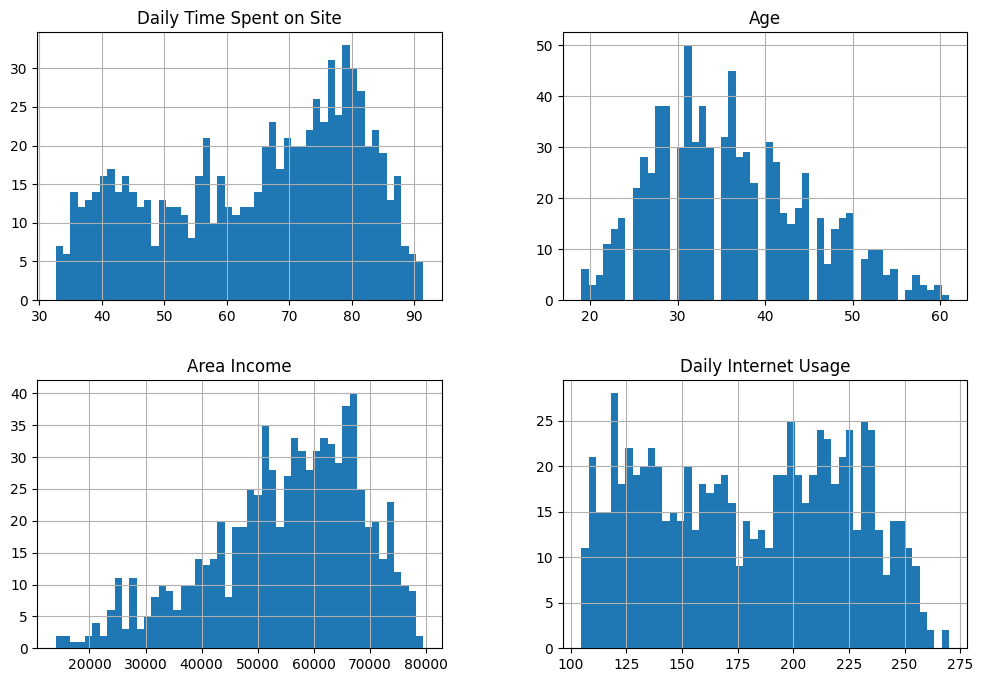

In [28]:
numericas_cont = ["Daily Time Spent on Site", "Age", "Area Income", "Daily Internet Usage"]
train_set[numericas_cont].hist(bins=50, figsize=(12, 8))  # Selecionar múltiplas colunas
plt.show()

### Ejercicio 7

Muestra las correlaciones de las variables continuas con un "PairPlot" y emplea como codigo de color la variable target. [Esto es otra forma de hacer un bivariante y un multivariante a la vez]. Para ello como argumento del pairplot de seaborn usa el dataframe de train (no la matriz de correlación)

In [31]:
target = "Clicked on Ad"

numericas_cont = numericas_cont + [target]
corr_matrix = train_set[numericas_cont].corr(numeric_only= True)
corr_matrix[target].sort_values(ascending = False)
print(corr_matrix)

columnas = corr_matrix[target][corr_matrix[target] != 0.0].index.to_list()

                          Daily Time Spent on Site       Age  Area Income  \
Daily Time Spent on Site                  1.000000 -0.330983     0.315638   
Age                                      -0.330983  1.000000    -0.174482   
Area Income                               0.315638 -0.174482     1.000000   
Daily Internet Usage                      0.503221 -0.355483     0.339533   
Clicked on Ad                            -0.749999  0.478552    -0.475848   

                          Daily Internet Usage  Clicked on Ad  
Daily Time Spent on Site              0.503221      -0.749999  
Age                                  -0.355483       0.478552  
Area Income                           0.339533      -0.475848  
Daily Internet Usage                  1.000000      -0.774017  
Clicked on Ad                        -0.774017       1.000000  


c:\Users\lucas\anaconda3\envs\GPU-TensorFlow\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\lucas\anaconda3\envs\GPU-TensorFlow\lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\lucas\anaconda3\envs\GPU-TensorFlow\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\lucas\anaconda3\envs\GPU-TensorFlow\lib\site-packages\seaborn\_oldcore.py:1075: Future

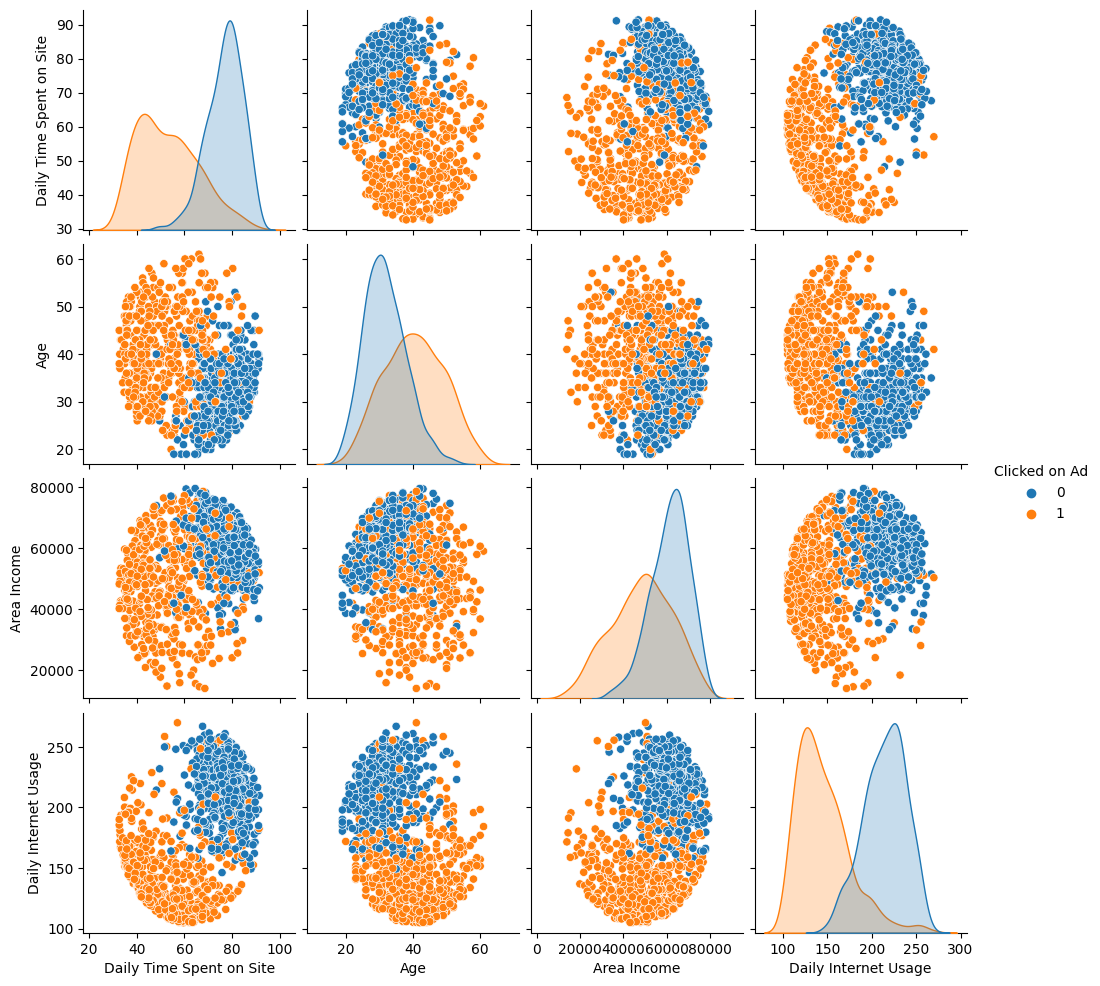

In [45]:
pairplot_df = df_adv[columnas]

sns.pairplot(pairplot_df, hue=target, corner=False)
plt.show()

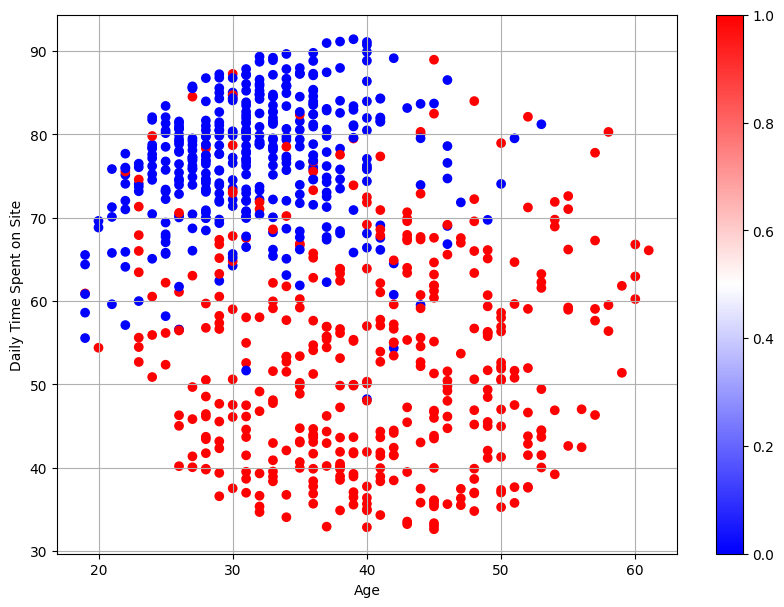

In [44]:
plt.figure(figsize=(10,7))
plt.scatter(train_set["Age"], train_set["Daily Time Spent on Site"], c = train_set[target], cmap = "bwr")
plt.grid()
plt.xlabel("Age")
plt.ylabel("Daily Time Spent on Site")
cbar = plt.colorbar()
plt.show()

In [ ]:
plt.figure(figsize=(10,7))
plt.scatter(train_set["Age"], train_set["Area Income"], c = train_set[target], cmap = "bwr")
plt.grid()
plt.xlabel("Age")
plt.ylabel("Area Income")
cbar = plt.colorbar()
plt.show()

### Ejercicio 8

Fijándote en la diagonal principal del gráfico anterior haz una selecció de features:

In [46]:
features = ["Age", "Daily Time Spent on Site", "Daily Internet Usage"]